In [27]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
 'Normal Nucleoli', 'Mitoses','Class']
data = data.drop(['Sample code'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [28]:
import numpy as np
data = data.replace('?',np.NaN)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print('Number of missing values:')
for col in data.columns:
 print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


In [29]:
data1=data
data1 = data1.fillna(data1.median())
print('\nAfter replacing missing values:')
data1[20:25]


After replacing missing values:


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
20,7,3,2,10,5,10,5,4,4,4
21,10,5,5,3,6,7,7,10,1,4
22,3,1,1,1,2,1,2,1,1,2
23,8,4,5,1,2,1,7,3,1,4
24,1,1,1,1,2,1,3,1,1,2


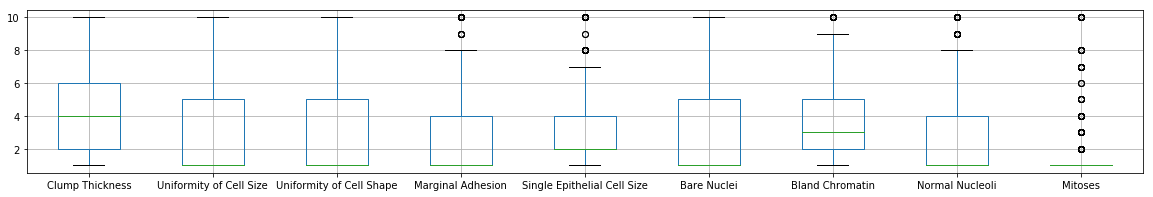

In [30]:
%matplotlib inline
data_box_data1 = data1.drop(['Class'],axis=1)
data_box_data1['Bare Nuclei'] = pd.to_numeric(data_box_data1['Bare Nuclei'])
data_box_data1.boxplot(figsize=(20,3))

In [31]:
data1_x = data1.drop(['Class'],axis=1)
print('Number of instances = %d' % (data1_x.shape[0]))
print('Number of attributes = %d' % (data1_x.shape[1]))
data1_x.head()
data1_y = data1['Class']
print('Number of instances = %d' % (data1_y.shape[0]))
#print('Number of attributes = %d' % (data1_y.shape[1]))
data1_y.head()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1_x, data1_y, test_size = 0.2,random_state = 0)

Number of instances = 699
Number of attributes = 9
Number of instances = 699


In [32]:
print(X_train.shape)
print(y_train.shape)

(559, 9)
(559,)


[0.9642857142857143, 0.9785714285714285, 0.9785714285714285, 0.9785714285714285, 0.9714285714285714, 0.9714285714285714, 0.9642857142857143]
0.9724489795918367


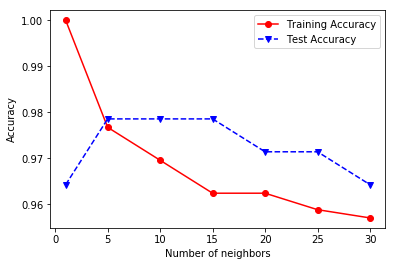

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd1 = []
testAcc_knndB = []
for k in numNeighbors:
    clf_knnd2 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf_knnd2.fit(X_train, y_train)
    Y_predTrain_knnd2 = clf_knnd2.predict(X_train)
    Y_predTest_knnd2 = clf_knnd2.predict(X_test)
    trainAcc_knnd1.append(accuracy_score(y_train,Y_predTrain_knnd2))
    testAcc_knndB.append(accuracy_score(y_test,Y_predTest_knnd2))
plt.plot(numNeighbors,trainAcc_knnd1,'ro-',numNeighbors,testAcc_knndB,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

print(testAcc_knndB)
print(np.mean(testAcc_knndB))

[0.6071428571428571, 0.9357142857142857, 0.9357142857142857, 0.9357142857142857, 0.9428571428571428, 0.95, 0.9571428571428572, 0.9571428571428572, 0.9571428571428572, 0.9571428571428572]
0.9135714285714286


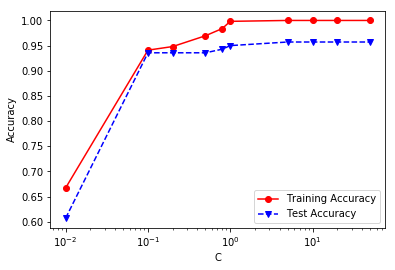

In [34]:
from sklearn.svm import SVC
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X_train,y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    SVMtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
print(SVMtestAcc)
print(np.mean(SVMtestAcc))

[0.9785714285714285, 0.9714285714285714, 0.9428571428571428]
0.9642857142857143


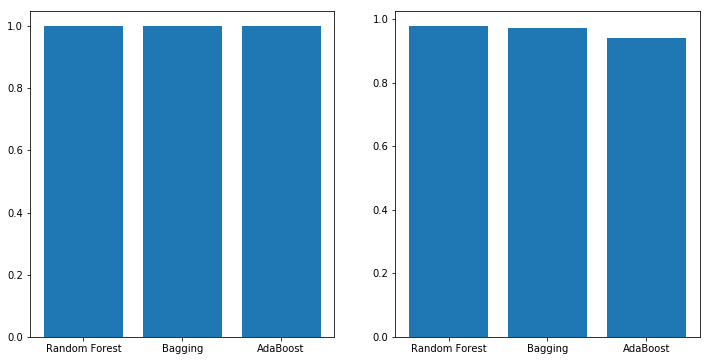

In [35]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numBaseClassifiers = 500
maxdepth = 10
trainAcc = []
testAcc = []

clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
clf.fit(X_train, y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))

clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))

clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))

methods = ['Random Forest', 'Bagging', 'AdaBoost']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5], trainAcc)
ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(methods)
ax2.bar([1.5,2.5,3.5], testAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)
print(testAcc)
print(np.mean(testAcc))

In [36]:
data2=data
data2 = data2.fillna(data2.median())
print('\nAfter replacing missing values:')
data2[20:25]


After replacing missing values:


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
20,7,3,2,10,5,10,5,4,4,4
21,10,5,5,3,6,7,7,10,1,4
22,3,1,1,1,2,1,2,1,1,2
23,8,4,5,1,2,1,7,3,1,4
24,1,1,1,1,2,1,3,1,1,2


In [37]:
AC1 = data2.drop(['Class'],axis=1)
AC1['Bare Nuclei'] = pd.to_numeric(data_box_data1['Bare Nuclei'])
#manging
Z_AC1 = (AC1-AC1.mean())/AC1.std()
Z1 = data2.loc[((Z_AC1 > -3).sum(axis=1)==9) & ((Z_AC1 <= 3).sum(axis=1)==9),:]

data1_x = Z1.drop(['Class'],axis=1)
data1_y = Z1['Class']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1_x, data1_y, test_size = 0.2,random_state = 0)

In [39]:
print(X_train.shape)
print(y_train.shape)

(518, 9)
(518,)


[0.9461538461538461, 0.9769230769230769, 0.9615384615384616, 0.9692307692307692, 0.9692307692307692, 0.9692307692307692, 0.9615384615384616]
0.9648351648351648


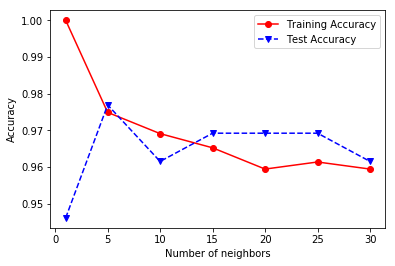

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd1 = []
testAcc_knndB = []
for k in numNeighbors:
    clf_knnd2 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf_knnd2.fit(X_train, y_train)
    Y_predTrain_knnd2 = clf_knnd2.predict(X_train)
    Y_predTest_knnd2 = clf_knnd2.predict(X_test)
    trainAcc_knnd1.append(accuracy_score(y_train,Y_predTrain_knnd2))
    testAcc_knndB.append(accuracy_score(y_test,Y_predTest_knnd2))
plt.plot(numNeighbors,trainAcc_knnd1,'ro-',numNeighbors,testAcc_knndB,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

print(testAcc_knndB)
print(np.mean(testAcc_knndB))

[0.7, 0.9384615384615385, 0.9461538461538461, 0.9615384615384616, 0.9538461538461539, 0.9538461538461539, 0.9538461538461539, 0.9538461538461539, 0.9538461538461539, 0.9538461538461539]
0.926923076923077


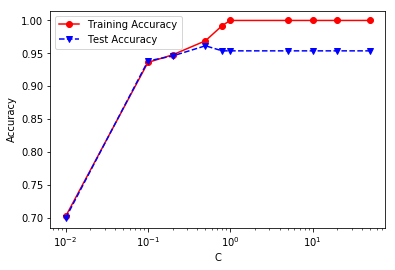

In [41]:
from sklearn.svm import SVC
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X_train,y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    SVMtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
print(SVMtestAcc)
print(np.mean(SVMtestAcc))

[0.9769230769230769, 0.9769230769230769, 0.9615384615384616]
0.9717948717948718


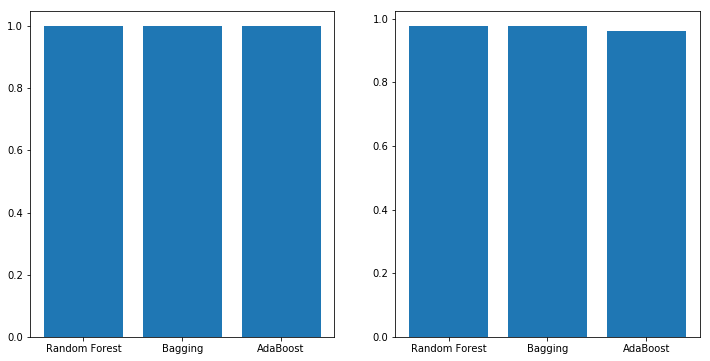

In [42]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numBaseClassifiers = 500
maxdepth = 10
trainAcc = []
testAcc = []

clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
clf.fit(X_train, y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))

clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))

clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))

methods = ['Random Forest', 'Bagging', 'AdaBoost']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5], trainAcc)
ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(methods)
ax2.bar([1.5,2.5,3.5], testAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)

print(testAcc)
print(np.mean(testAcc))

In [43]:
data3=data
data3 = data3.fillna(data3.median())
print('\nAfter replacing missing values:')
data3[20:25]


After replacing missing values:


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
20,7,3,2,10,5,10,5,4,4,4
21,10,5,5,3,6,7,7,10,1,4
22,3,1,1,1,2,1,2,1,1,2
23,8,4,5,1,2,1,7,3,1,4
24,1,1,1,1,2,1,3,1,1,2


In [44]:
import pandas as pd
data3 = data3.drop_duplicates()
data1_x = data3.drop(['Class'],axis=1)
data1_y = data3['Class']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1_x, data1_y, test_size = 0.2,random_state = 0)

In [46]:
print(X_train.shape)
print(y_train.shape)

(370, 9)
(370,)


[0.9139784946236559, 0.946236559139785, 0.9354838709677419, 0.9354838709677419, 0.9247311827956989, 0.9247311827956989, 0.9247311827956989]
0.9293394777265745


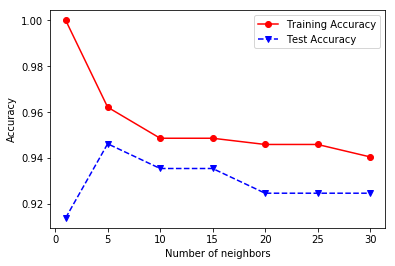

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd1 = []
testAcc_knndB = []
for k in numNeighbors:
    clf_knnd2 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf_knnd2.fit(X_train, y_train)
    Y_predTrain_knnd2 = clf_knnd2.predict(X_train)
    Y_predTest_knnd2 = clf_knnd2.predict(X_test)
    trainAcc_knnd1.append(accuracy_score(y_train,Y_predTrain_knnd2))
    testAcc_knndB.append(accuracy_score(y_test,Y_predTest_knnd2))
plt.plot(numNeighbors,trainAcc_knnd1,'ro-',numNeighbors,testAcc_knndB,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

print(testAcc_knndB)
print(np.mean(testAcc_knndB))

[0.4946236559139785, 0.9139784946236559, 0.9139784946236559, 0.9139784946236559, 0.9354838709677419, 0.956989247311828, 0.946236559139785, 0.946236559139785, 0.946236559139785, 0.946236559139785]
0.8913978494623656


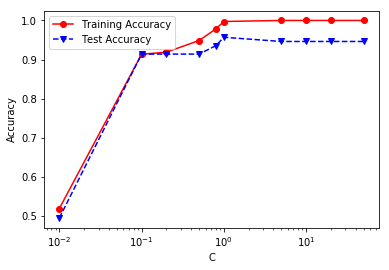

In [48]:
from sklearn.svm import SVC
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X_train,y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    SVMtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
print(SVMtestAcc)
print(np.mean(SVMtestAcc))

[0.946236559139785, 0.9139784946236559, 0.9139784946236559]
0.924731182795699


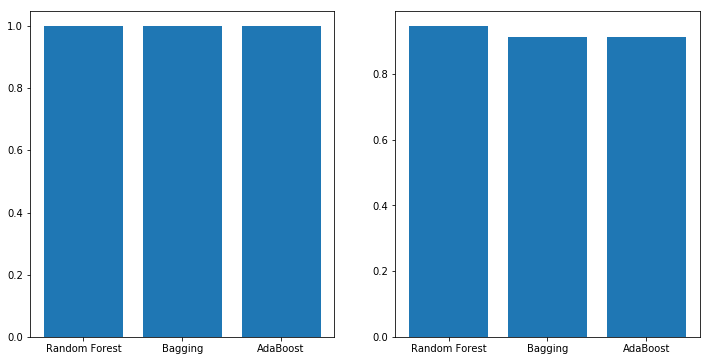

In [49]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numBaseClassifiers = 500
maxdepth = 10
trainAcc = []
testAcc = []

clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
clf.fit(X_train, y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))

clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))

clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))

methods = ['Random Forest', 'Bagging', 'AdaBoost']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5], trainAcc)
ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(methods)
ax2.bar([1.5,2.5,3.5], testAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)
print(testAcc)
print(np.mean(testAcc))